In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import ArtistAnimation
import pickle, os

In [6]:
st_dir = os.path.join('.', 'st')
i = 1
with open('st%02i_objects.pkl' % (i, ), 'rb') as f:    
    sv_objects = pickle.load(f)

In [7]:
n_frames = len(sv_objects)
n_objects_by_frame = np.array([len(d) for d in sv_objects])

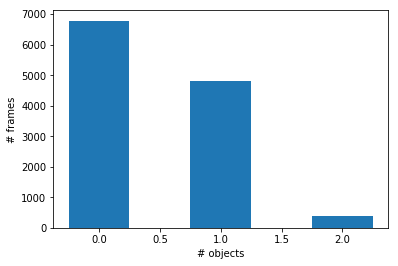

fraction frames with no objects: 0.565417


In [8]:
plt.hist(n_objects_by_frame, bins=n_objects_by_frame.max(), align='left', rwidth=0.5)
plt.xlabel('# objects')
plt.ylabel('# frames')
plt.show()
print('fraction frames with no objects: %f' % (n_objects_by_frame == 0).mean())

In [16]:
unique_objects = np.unique(np.concatenate([list(d.keys()) for d in sv_objects]))
n_unique_objects = len(unique_objects)
object_index = dict(zip(unique_objects, range(n_unique_objects)))

'airplane'

In [10]:
objects_barcode = np.zeros((n_unique_objects, n_frames), dtype=bool)
for frame, d in enumerate(sv_objects):
    for object in d:
        objects_barcode[object_index[object], frame] = True

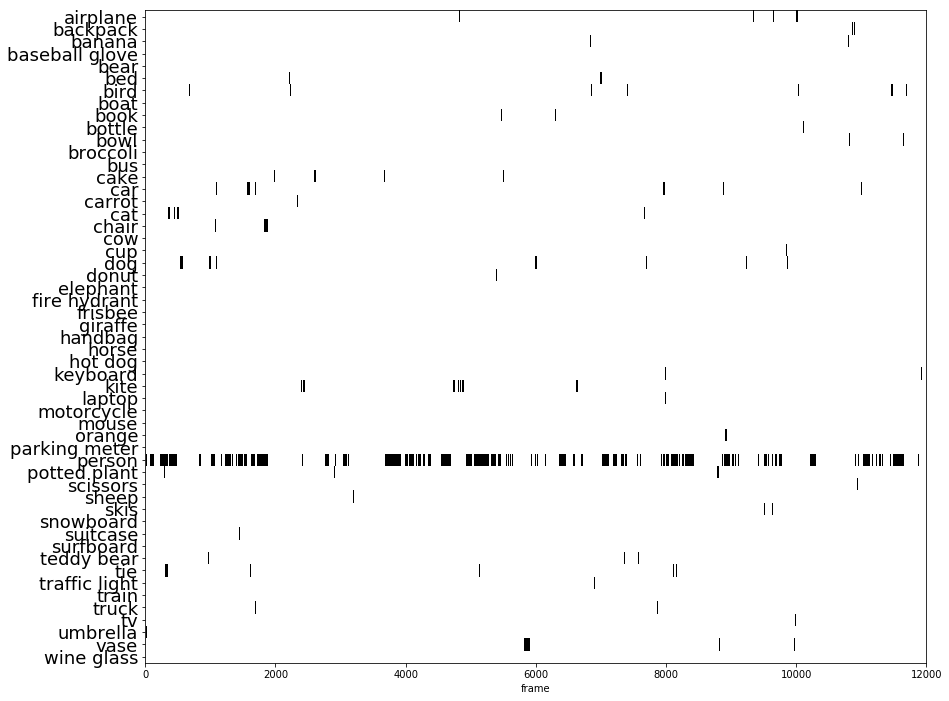

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(14,12))
ax.imshow(objects_barcode, aspect='auto', cmap=plt.get_cmap('Greys'))
ax.set_yticks(range(n_unique_objects))
ax.set_yticklabels(unique_objects, fontsize=18)
ax.set_xlabel('frame')
plt.show()

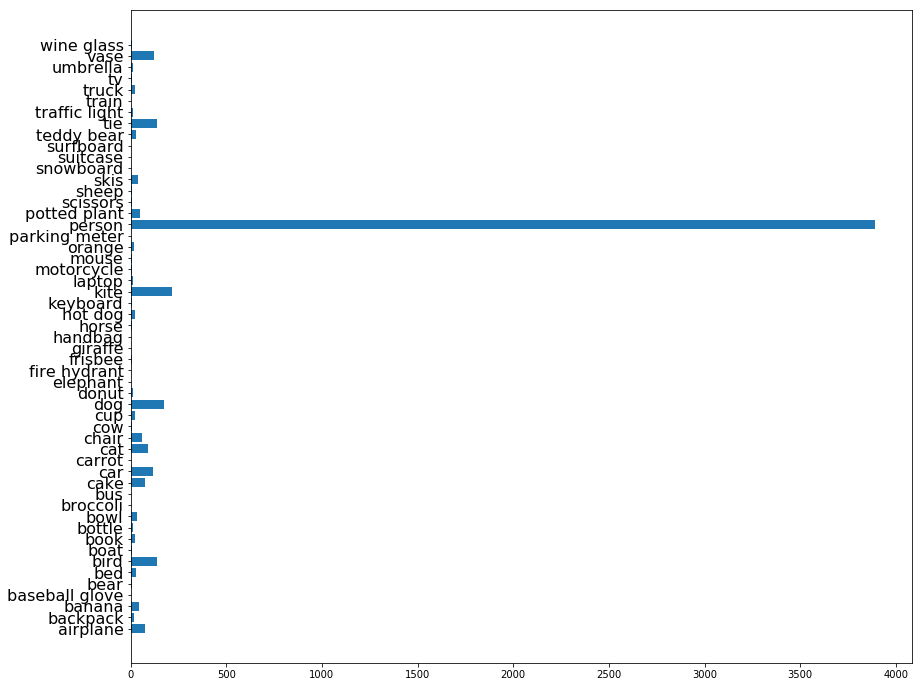

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(14,12))
ax.barh(range(n_unique_objects), objects_barcode.sum(1), align='center')
ax.set_yticks(range(n_unique_objects))
ax.set_yticklabels(unique_objects, fontsize=16)
plt.show()

In [ ]:
if not os.path.exists('sv_words.mp4'):
    sv = np.load('sv.npy')

    fig = plt.figure(figsize=(8,8))
    ax = plt.gca()
    ax.axis('off')

    artists = [[ax.imshow(sv[frame], aspect='equal')] 
               + [ax.text(64, 64, unique_objects[objects_barcode[:, frame]], ha='center', fontsize=24, color='r')] for frame in range(n_frames)]
    anim = ArtistAnimation(fig, artists, interval=1000./15.)
    anim.save('sv_.mp4')

In [10]:
from IPython.core.display import display, HTML
display(HTML('<video controls><source src="sv.mp4" type="video/mp4"></video>'))